In [1]:
import sys   
!{sys.executable} -m pip install --user yacs

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils_inference import get_lmks_by_img, get_model_by_name, get_preds, decode_preds, crop
from utils_landmarks import show_landmarks, get_five_landmarks_from_net, alignment_orig, get_six_landmarks_from_net

In [3]:
#Full Left : DSC_3561
#Half Left : DSC_3560
#Center    : DSC_3558
#Half Right: DSC_3563
#Full Right: DSC_3564
#img = cv2.imread('./images/SHW/DSC_3558.JPG')

img = cv2.imread('./images/KJT/DSC_3517.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
CIRCLE_SIZE = img.shape[0]//200

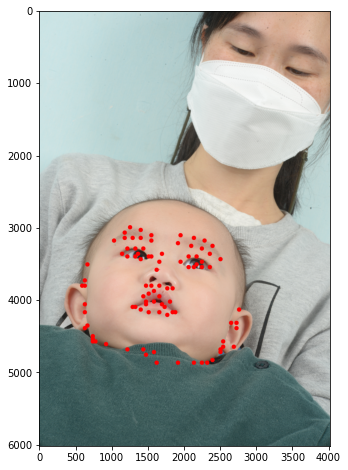

In [4]:
model = get_model_by_name('WFLW', device='cuda')
lmks1 = get_lmks_by_img(model, img) 
show_landmarks(img, lmks1, circle_size=CIRCLE_SIZE)

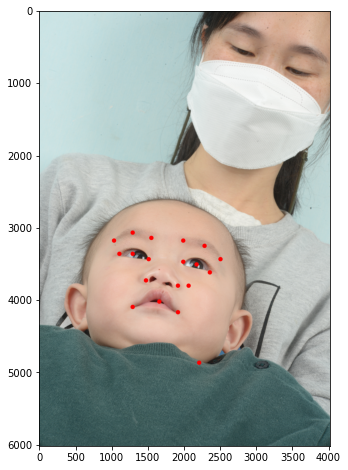

In [5]:
model = get_model_by_name('AFLW')
lmks2 = get_lmks_by_img(model, img) 
show_landmarks(img, lmks2, circle_size=CIRCLE_SIZE)

In [6]:
six_lmks = get_six_landmarks_from_net(lmks2)
print(six_lmks)

[[1292.0 3357.0]
 [2174.0 3504.0]
 [2064.0 3798.0]
 [1292.0 4092.0]
 [1917.0 4165.0]
 [None None]]


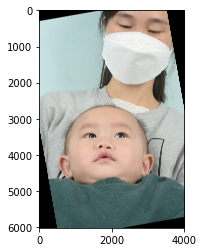

In [10]:
deg = 10

R = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), deg, 1)
T = [ [1, 0, 0],
     [0, 1, 0] 
    ]
T = np.float32(T)
transformed_img = cv2.warpAffine(img, R, (img.shape[1], img.shape[0]))
plt.imshow(transformed_img)
plt.show()

In [11]:
img.shape

(6016, 4016, 3)

In [14]:
def crop_after_rotation(img, deg):
    width = img.shape[1]
    height = img.shape[0]
    R = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), deg, 1)
    rot_img = cv2.warpAffine(img, R, (img.shape[1], img.shape[0]))
    import math
    rad = math.radians(deg)
    tan_05 = math.tan(rad/2)
    tan_1 = math.tan(rad)
    offset_h = (width/2-height/2*tan_05)*tan_1
    offset_w = (height/2-width/2*tan_05)*tan_1
    
    crop_rot_img = rot_img[int(offset_h) : int(height-offset_h), 
                           int(offset_w) : int(width-offset_w)
                          ]
    
    return crop_rot_img

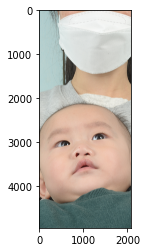

In [18]:
plt.imshow(crop_after_rotation(img, 20))
plt.show()

In [ ]:
model = get_model_by_name('COFW')
lmks3 = get_lmks_by_img(model, img) 
show_landmarks(img, lmks3, circle_size=CIRCLE_SIZE)

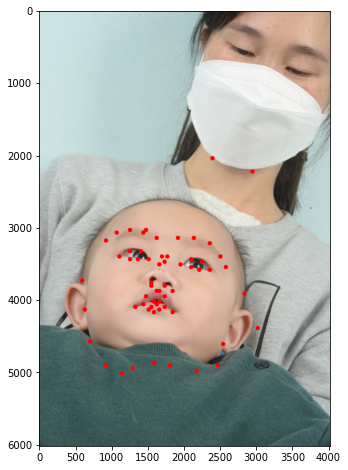

In [27]:
model = get_model_by_name('300W')
lmks4 = get_lmks_by_img(model, img) 
show_landmarks(img, lmks4, circle_size=CIRCLE_SIZE)

In [7]:
#I decide to use AFLW model, it only return few points but have high confidence. High Recall

[[1476. 2990.]
 [2431. 2953.]
 [1953. 3431.]
 [1586. 3945.]
 [2321. 3945.]]


/data/HRNet-landmarks/matlab_cp2tform.py:314: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)


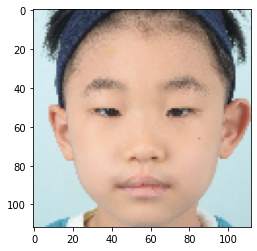

In [8]:
five_lmks = get_five_landmarks_from_net(lmks2)
print(five_lmks)
aligned_img = alignment_orig(img, five_lmks, ncols=112, nrows=112)

import matplotlib.pyplot as plt
plt.imshow(aligned_img)
plt.show()

[[1513. 2953.]
 [2394. 2953.]
 [1953. 3247.]
 [1623. 3908.]
 [2247. 3945.]]


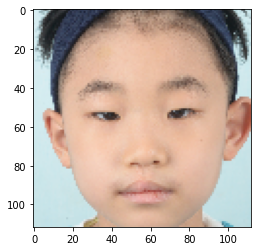

In [9]:
center_five_lmks = get_five_landmarks_from_net(lmks1)
print(center_five_lmks)
aligned_img = alignment_orig(img, center_five_lmks, ncols=112, nrows=112)

import matplotlib.pyplot as plt
plt.imshow(aligned_img)
plt.show()

[[1513. 2953.]
 [2394. 2953.]
 [1953. 3247.]
 [1623. 3908.]
 [2247. 3945.]]


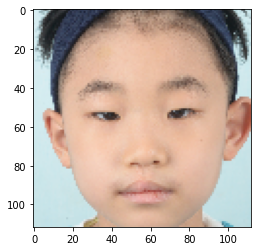

In [10]:
five_lmks = get_five_landmarks_from_net(lmks1)
print(five_lmks)
aligned_img = alignment_orig(img, center_five_lmks, ncols=112, nrows=112)

import matplotlib.pyplot as plt
plt.imshow(aligned_img)
plt.show()